# Evaluate the mode

In [13]:
import os
import logging

logging.basicConfig(level=logging.ERROR)

import pandas as pd
from tqdm import tqdm

from src.util import seed_everything, cleanup
from src.models.t5 import T5Model
from src.config import SEED, INTERIM_DATA_DIR
from src.metrics import calculate_all
from src.data.dataset import create_loaders

In [23]:
cleanup()

In [16]:
if not INTERIM_DATA_DIR.exists():
    os.chdir("..")

In [17]:
seed_everything(SEED)

In [18]:
BATCH_SIZE = 32

In [24]:
train_loader, val_loader, test_loader = create_loaders(
    pd.read_csv(INTERIM_DATA_DIR / "swapped.csv"),
    batch_size=BATCH_SIZE,
    test_fraction=1 / 500,
)

In [25]:
model = T5Model()

In [26]:
logging.basicConfig(level=logging.ERROR)

In [27]:
all_predictions = []
for i, batch in (pbar := tqdm(enumerate(test_loader), total=len(test_loader))):
    inputs, target = batch
    test_pred = model.predict(inputs)
    all_predictions.extend(test_pred)

100%|██████████| 37/37 [20:24<00:00, 33.09s/it]


In [28]:
cleanup()

In [32]:
all_targets = sum((b[1] for b in test_loader), [])
all_sources = sum((b[0] for b in test_loader), [])
non_tox, bert, bleu = calculate_all(
    all_sources, all_predictions, all_targets, BATCH_SIZE
)
f"{non_tox=:.3f} {bert=:.3f} {bleu=:.3f}"

'non_tox=0.675 bert=0.421 bleu=0.204'

# Visualize the predictions

In [33]:
import matplotlib.pyplot as plt

from src.visualization.make_wordcloud import make_wordcloud

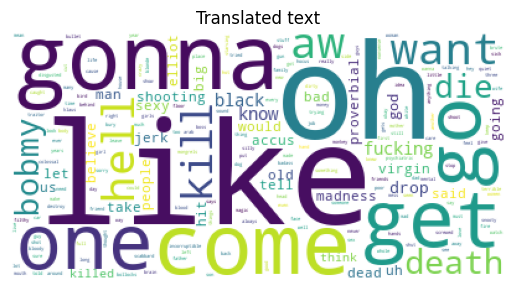

In [34]:
plt.title("Translated text")
plt.axis("off")
plt.imshow(make_wordcloud(pd.Series(all_predictions)))
plt.show()